In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Baca dataset
print("="*60)
print("1. MEMBACA DATASET")
print("="*60)

# Membaca file CSV dengan delimiter semicolon
df = pd.read_csv('..\Dataset\API_Kaggle\Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';', decimal=',')

print(f"Shape dataset: {df.shape}")
print(f"\nKolom-kolom dalam dataset:")
print(df.columns.tolist())
print(f"\n5 baris pertama dataset:")
print(df.head())

1. MEMBACA DATASET
Shape dataset: (999, 13)

Kolom-kolom dalam dataset:
['Provinsi', 'Kab/Kota', 'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)', 'Indeks Pembangunan Manusia', 'Umur Harapan Hidup (Tahun)', 'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak', 'Persentase rumah tangga yang memiliki akses terhadap air minum layak', 'Tingkat Pengangguran Terbuka', 'Tingkat Partisipasi Angkatan Kerja', 'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)', 'Klasifikasi Kemiskinan']

5 baris pertama dataset:
  Provinsi       Kab/Kota  \
0     ACEH       Simeulue   
1     ACEH   Aceh Singkil   
2     ACEH   Aceh Selatan   
3     ACEH  Aceh Tenggara   
4     ACEH     Aceh Timur   

  Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
0                                              18,98                
1                        

In [10]:
df.describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)
count,514.000000,5.140000e+02
mean,10324.787938,2.196408e+07
std,2717.144186,4.790492e+07
min,3976.000000,1.474850e+05
25%,8574.000000,3.654292e+06
50%,10196.500000,8.814926e+06
75%,11719.000000,1.973510e+07
max,23888.000000,4.600810e+08


In [11]:
df.isna().sum()

Provinsi                                                                485
Kab/Kota                                                                485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            485
Indeks Pembangunan Manusia                                              485
Umur Harapan Hidup (Tahun)                                              485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     485
Persentase rumah tangga yang memiliki akses terhadap air minum layak    485
Tingkat Pengangguran Terbuka                                            485
Tingkat Partisipasi Angkatan Kerja                                      485
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              485
Klasifikasi Kemiskinan                                                  485
dtype: int64

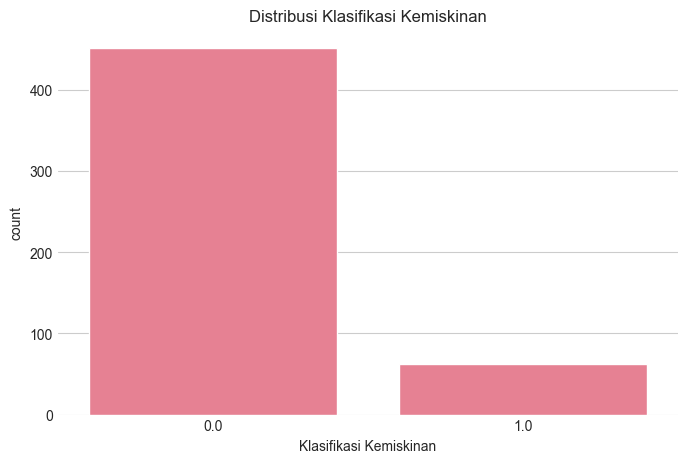

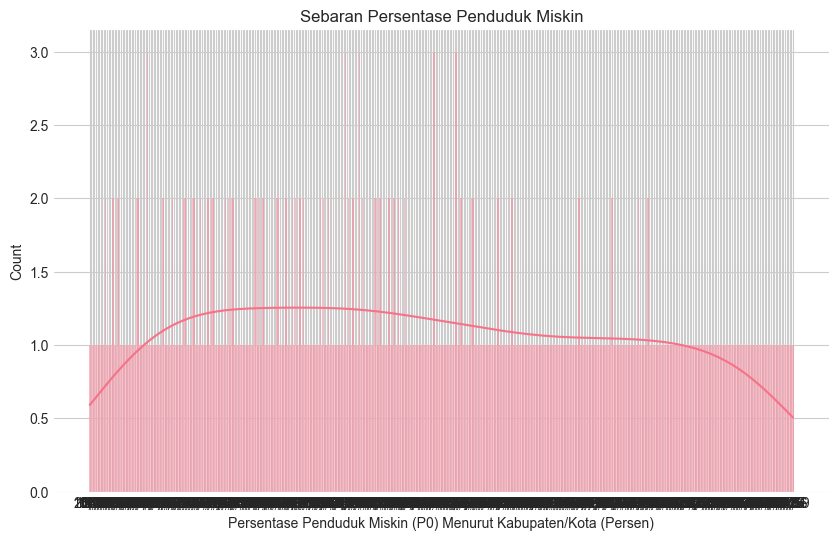

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Klasifikasi Kemiskinan', data=df)
plt.title("Distribusi Klasifikasi Kemiskinan")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'], kde=True)
plt.title("Sebaran Persentase Penduduk Miskin")
plt.show()

In [22]:
# 4. Data preparation: ubah format, pastikan tipe numerik
df2 = df.copy()
num_cols = [c for c in df2.columns if c not in ['Provinsi','Kab/Kota','Klasifikasi Kemiskinan']]
for c in num_cols:
    df2[c] = df2[c].astype(str).str.replace(' ', '').str.replace(',', '.')
    df2[c] = pd.to_numeric(df2[c], errors='coerce')

df2 = df2.dropna(subset=['Klasifikasi Kemiskinan']).reset_index(drop=True)
df2.head()


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0,0.0
1,ACEH,Aceh Singkil,20.36,8.68,8776.0,69.22,67.43,69.56,78.58,8.36,62.85,1780419.0,1.0
2,ACEH,Aceh Selatan,13.18,8.88,8180.0,67.44,64.40,62.55,79.65,6.46,60.85,4345784.0,0.0
3,ACEH,Aceh Tenggara,13.41,9.67,8030.0,69.44,68.22,62.71,86.71,6.43,69.62,3487157.0,0.0
4,ACEH,Aceh Timur,14.45,8.21,8577.0,67.83,68.74,66.75,83.16,7.13,59.48,8433526.0,0.0


In [23]:
# 5. Menghapus data kosong dan outlier sederhana
df2 = df2.dropna().reset_index(drop=True)
print("Data bersih:", df2.shape)


Data bersih: (514, 13)


=== HASIL KLASIFIKASI METODE RANDOM FOREST ===


,Model,Akurasi,Presisi,Recall,F1-Score
0,Random Forest Classifier,0.980583,0.857143,1.0,0.923077


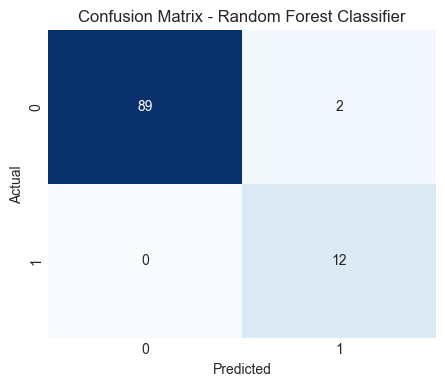


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        91
           1       0.86      1.00      0.92        12

    accuracy                           0.98       103
   macro avg       0.93      0.99      0.96       103
weighted avg       0.98      0.98      0.98       103



In [25]:
# 6. Melakukan klasifikasi menggunakan metode Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = df2[num_cols]
y = df2['Klasifikasi Kemiskinan'].astype(int)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluasi model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil evaluasi dalam bentuk DataFrame (sesuai format UTS)
hasil_model = pd.DataFrame({
    'Model': ['Random Forest Classifier'],
    'Akurasi': [acc],
    'Presisi': [prec],
    'Recall': [rec],
    'F1-Score': [f1]
})

print("=== HASIL KLASIFIKASI METODE RANDOM FOREST ===")
display(hasil_model)

# Confusion Matrix visualisasi (sama gaya seperti UTS)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Laporan klasifikasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


In [26]:
# 7. Tuning Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': None, 'n_estimators': 50}


In [27]:
# 8. Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9805825242718447
Precision: 0.8571428571428571
Recall: 1.0
F1 Score: 0.9230769230769231
Confusion Matrix:
 [[89  2]
 [ 0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        91
           1       0.86      1.00      0.92        12

    accuracy                           0.98       103
   macro avg       0.93      0.99      0.96       103
weighted avg       0.98      0.98      0.98       103

